In [1]:
%matplotlib inline
import os
os.chdir("..")
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
from math import log
import random
import time
import pickle
from numpy.linalg import pinv
from arm_class import ArmGaussian
from LinUCB_class import PolicyLinUCB
from dLinUCB_class import DynamicLinUCB
from D_LinUCB_class import DLinUCB
from SW_LinUCB_class import SWLinUCB
from environment_class import Environment
from simulator_class import Simulator
from utils import plot_regret, scatter_abrupt, scatter_smooth, action_check, get_B_T_smooth, detection_sorted

In [2]:
# General parameters for all the experiments
delta = 0.01 # Probability of being outside the confidence interval
s = 1  # Bound on the theta_star parameter
lambda_ = 0.1 # Regularisation parameter
q = 5 # Diplaying the quantile (in %)

In [3]:
def experiment_policies(n_mc, option):
    mab = Environment(d, theta, sigma_noise, verbose)
    simulator = Simulator(mab, theta, policies, k, d, steps, bp, verbose)
    if option == "par":
        avgRegret, qRegret, QRegret = simulator.run_multiprocessing(n_process, steps, n_mc, q, t_saved)
        return avgRegret, qRegret, QRegret
    else:
        avgRegret, qRegret, QRegret, timedic, theta_hat, action_check = simulator.run(steps, 
                                                               n_mc, q, n_scat, t_saved)
        return avgRegret, qRegret, QRegret, timedic, theta_hat, action_check

def data_from_experiment(n_mc, option):
    if option == "par":
        avgRegret, qRegret, QRegret = experiment_policies(n_mc, option)
        data = [[policy, avgRegret[policy], qRegret[policy],
                QRegret[policy]] for policy in avgRegret]
        return data
    else:
        avgRegret, qRegret, QRegret, timedic, theta_hat, action_check = experiment_policies(n_mc, '')
        data = [[policy, avgRegret[policy], qRegret[policy],
                QRegret[policy]] for policy in avgRegret]
        return data, theta_hat, action_check, timedic

In [4]:
# The saved files should be located in the saved/ folder
# The output images would be located in the out/ folder
# If the folders are not created they must be created to run the code without bugs

path = os.getcwd()
out_dir = 'out_ABRUPT_NEW'
saved_data_path = 'out_ABRUPT_NEW'
detection_folder = 'detection_out'

if not os.path.exists(path + '/' + out_dir):
    os.mkdir(path + '/' + out_dir)
    print('Creating the folder %s' %out_dir)
else:
    print("%s already exists" %out_dir)
    
if not os.path.exists(path + '/' + saved_data_path):
    os.mkdir(path + '/' + saved_data_path)
    print('Creating the folder %s' %saved_data_path)
else:
    print("%s already exists" %saved_data_path)
    
if not os.path.exists(path + '/' + detection_folder):
    os.mkdir(path + '/' + detection_folder)
    print('Creating the folder %s' %detection_folder)
else:
    print("%s already exists" %detection_folder)

out_ABRUPT_NEW already exists
out_ABRUPT_NEW already exists
detection_out already exists


In [5]:
def save_file(filename, var):
    with open(saved_data_path + '/' + str(filename) + '.pkl', 'wb') as f:
        pickle.dump(var, f)

def load_file(filename):
    with open(saved_data_path + '/' + str(filename) + '.pkl', 'rb') as f:
        res = pickle.load(f)
        return res

def save_file_from_folder(folder, filename, var):
    with open(str(folder) + '/' + str(filename) + '.pkl', 'wb') as f:
        pickle.dump(var, f)
        
def load_file_from_folder(folder, filename):
    with open(str(folder) + '/' + str(filename) + '.pkl', 'rb') as f:
        res = pickle.load(f)
        return res

In [6]:
# PARAMETERS
d = 2  # dimension of the problem
k = 50  # number of arms at each step
steps = 6000  # number of steps for the experiment
n_scat = 1000 # How frequently should we plot the true parameter
t_saved = None

# When saving only a part of the trajectory rather than all the points uncomment the 2 following lines
# number_t_saved = steps//10
# t_saved = np.int_(np.linspace(0, steps - 1, number_t_saved))

alpha = 1
sigma_noise = 1 # Square root of the variance of the noise
verbose = False
q = 5 # 5 percent quantiles used

### Description of the experiment
theta = np.array([1,  0]) # Starting point of the true unknown parameter
bp = {1001: np.array([-1,  0]), 2001: np.array([0,  1]), 3001: np.array([0,  -1])} # Descrition of the breakpoints

B_T = 4 + np.sqrt(2) # Computed manually
print('B_T value:', B_T)
print('Sigma value for the experimenxt:', sigma_noise)

gamma  = 1 - (B_T/(d*steps))**(2/3) # Optimal Value to minimize the asymptotical regret
tau = (d*steps/B_T)**(2/3) # Optimal Value to minimize the asymptotical regret
print('gamma:', gamma)
print('tau:', tau)

policies = [DLinUCB(d, delta, alpha, lambda_, s, gamma, '', sm = False, sigma_noise = sigma_noise, verbose=verbose),
            SWLinUCB(d, delta, alpha, lambda_, s, tau, '', sm=False, sigma_noise=sigma_noise, verbose=verbose),
            DynamicLinUCB(d, delta, alpha, lambda_, s, tau=200, name='', filename = 'abrupt_exp_final',
                          sm=True, sigma_noise = sigma_noise, delta_2=0.01, tilde_delta=0.002, verbose=False, 
                          omniscient=False),
            PolicyLinUCB(d, delta, alpha, lambda_, s, '', sm = True, sigma_noise = sigma_noise, verbose=verbose),
            PolicyLinUCB(d, delta, alpha, lambda_, s, '-OR', sm = True, sigma_noise = sigma_noise, verbose=verbose,
                        omniscient = True)
           ]

B_T value: 5.414213562373095
Sigma value for the experimenxt: 1
gamma: 0.9941173985691094
tau: 169.99281895061446


# Unparallelized experiments

In [7]:
data, theta_hat, action_check_val, timedic = data_from_experiment(n_mc=2, option = '')

  0%|          | 0/2 [00:00<?, ?it/s]

0 D-LinUCB [0. 0.] [1 0]
1000 D-LinUCB [1.0336647  0.15032362] [1 0]
2000 D-LinUCB [-0.99439429  0.1253892 ] [-1  0]
3000 D-LinUCB [0.18665829 0.82470159] [0 1]
4000 D-LinUCB [ 0.14962014 -0.97342344] [ 0 -1]
5000 D-LinUCB [-0.09219099 -0.96700548] [ 0 -1]
0 SW-LinUCB [0. 0.] [1 0]
1000 SW-LinUCB [ 0.94207346 -0.11918458] [1 0]
2000 SW-LinUCB [-0.81413941  0.09369063] [-1  0]
3000 SW-LinUCB [0.00383771 1.05865697] [0 1]
4000 SW-LinUCB [-0.26719374 -0.96224329] [ 0 -1]
5000 SW-LinUCB [-0.14277934 -0.95955255] [ 0 -1]
0 dLinUCB [0. 0.] [1 0]
1000 dLinUCB [1.04543044 0.01047125] [1 0]
Creation of a new model at time:1143
2000 dLinUCB [-1.03135246  0.03413425] [-1  0]
3000 dLinUCB [-0.59847738  0.10386267] [0 1]
4000 dLinUCB [-0.49082773 -0.07334713] [ 0 -1]
5000 dLinUCB [-0.49697686 -0.16282064] [ 0 -1]
0 LinUCB [0. 0.] [1 0]
1000 LinUCB [ 0.99906161 -0.03878663] [1 0]
2000 LinUCB [0.08682585 0.00278432] [-1  0]
3000 LinUCB [0.15907871 0.54730433] [0 1]
4000 LinUCB [0.06069322 0.02766634]

 50%|█████     | 1/2 [00:22<00:22, 22.69s/it]

Creation of a new model at time:1152


100%|██████████| 2/2 [00:45<00:00, 22.59s/it]

-- Building data out of the experiments ---
--- Data built ---


{'D-LinUCB': 10.487666845321655, 'SW-LinUCB': 9.115904331207275, 'dLinUCB': 8.719751834869385, 'LinUCB': 8.368414402008057, 'LinUCB-OR': 8.357692241668701}


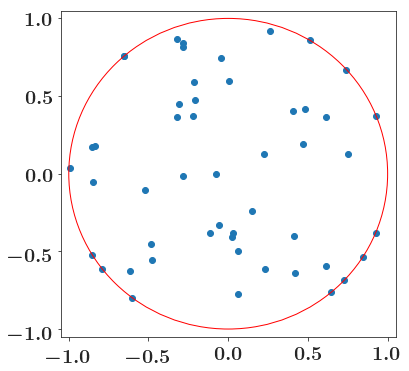

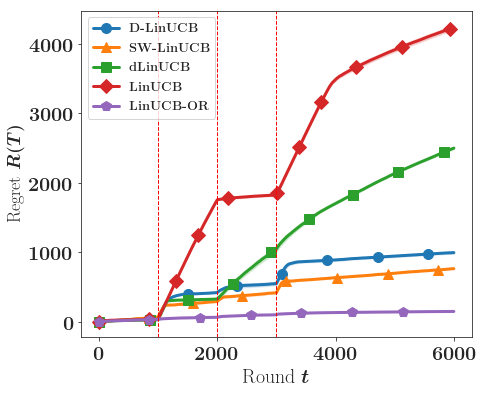

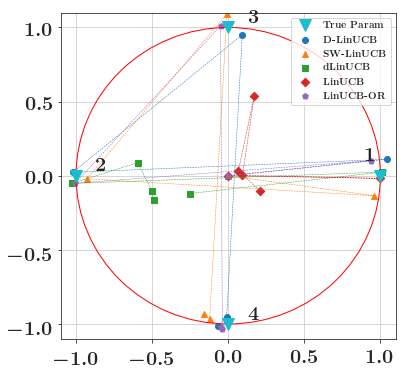

In [8]:
# Plot on a single experiment
print(timedic) # Computation time for the different policies
action_check(action_check_val, 0) # To see the available actions at one step
plot_regret(data, t_saved, filename = None, log=False, qtl=True, loc=2, font=13, bp = bp, bp_2 = {})
scatter_abrupt(theta_hat, None, theta, bp, loc=0, font=10, circle=True)

In [9]:
# 100 indepent experiments without parallelization, should take around half an hour.
data_100, theta_hat_100, action_check_val_100, timedic_100 = data_from_experiment(n_mc=100, option = '')

  0%|          | 0/100 [00:00<?, ?it/s]

0 D-LinUCB [0. 0.] [1 0]
1000 D-LinUCB [ 1.10028461 -0.00923249] [1 0]
2000 D-LinUCB [-0.92883273 -0.01456212] [-1  0]
3000 D-LinUCB [-0.05819116  0.97228247] [0 1]
4000 D-LinUCB [-0.19413356 -0.97887389] [ 0 -1]
5000 D-LinUCB [-0.11933417 -0.91318628] [ 0 -1]
0 SW-LinUCB [0. 0.] [1 0]
1000 SW-LinUCB [0.98908074 0.02045452] [1 0]
2000 SW-LinUCB [-1.04158366 -0.07015873] [-1  0]
3000 SW-LinUCB [-0.17663803  0.83564732] [0 1]
4000 SW-LinUCB [-0.04960634 -1.07285185] [ 0 -1]
5000 SW-LinUCB [ 0.02966317 -1.03225244] [ 0 -1]
0 dLinUCB [-0.47191378 -0.21313744] [1 0]
1000 dLinUCB [ 0.99477346 -0.03438142] [1 0]
Creation of a new model at time:1207
2000 dLinUCB [-0.9691038  0.0059536] [-1  0]
3000 dLinUCB [-0.63967061  0.75574878] [0 1]
4000 dLinUCB [-0.56415817  0.11048285] [ 0 -1]
5000 dLinUCB [ 0.17834485 -0.20157163] [ 0 -1]
0 LinUCB [0. 0.] [1 0]
1000 LinUCB [ 0.97834109 -0.0019178 ] [1 0]
2000 LinUCB [ 0.08975521 -0.00361395] [-1  0]
3000 LinUCB [0.1822434  0.49731152] [0 1]
4000 LinUCB

  1%|          | 1/100 [00:23<38:51, 23.55s/it]

Creation of a new model at time:1130


  3%|▎         | 3/100 [01:11<38:33, 23.85s/it]

Creation of a new model at time:1169


  4%|▍         | 4/100 [01:35<37:56, 23.72s/it]

Creation of a new model at time:1198


  5%|▌         | 5/100 [01:59<37:59, 24.00s/it]

Creation of a new model at time:1161


  6%|▌         | 6/100 [02:23<37:30, 23.94s/it]

Creation of a new model at time:1178


  7%|▋         | 7/100 [02:47<36:54, 23.82s/it]

Creation of a new model at time:1151


  8%|▊         | 8/100 [03:11<36:35, 23.87s/it]

Creation of a new model at time:1135


  9%|▉         | 9/100 [03:36<36:55, 24.35s/it]

Creation of a new model at time:1201


 10%|█         | 10/100 [04:01<36:37, 24.42s/it]

Creation of a new model at time:1102


 11%|█         | 11/100 [04:25<36:13, 24.43s/it]

Creation of a new model at time:1117


 12%|█▏        | 12/100 [04:51<36:17, 24.74s/it]

Creation of a new model at time:1128


 14%|█▍        | 14/100 [05:44<36:52, 25.73s/it]

Creation of a new model at time:1160


 15%|█▌        | 15/100 [06:08<35:43, 25.21s/it]

Creation of a new model at time:1142


 16%|█▌        | 16/100 [06:31<34:31, 24.66s/it]

Creation of a new model at time:1141


 17%|█▋        | 17/100 [06:55<33:46, 24.41s/it]

Creation of a new model at time:1119


 18%|█▊        | 18/100 [07:19<33:18, 24.37s/it]

Creation of a new model at time:1131


 19%|█▉        | 19/100 [07:43<32:32, 24.11s/it]

Creation of a new model at time:1127


 20%|██        | 20/100 [08:06<31:49, 23.86s/it]

Creation of a new model at time:1120


 21%|██        | 21/100 [08:29<31:10, 23.68s/it]

Creation of a new model at time:1154


 22%|██▏       | 22/100 [08:52<30:33, 23.50s/it]

Creation of a new model at time:1141


 23%|██▎       | 23/100 [09:16<30:06, 23.46s/it]

Creation of a new model at time:1192


 24%|██▍       | 24/100 [09:39<29:45, 23.49s/it]

Creation of a new model at time:1161


 25%|██▌       | 25/100 [10:02<29:16, 23.42s/it]

Creation of a new model at time:1129


 26%|██▌       | 26/100 [10:26<28:49, 23.37s/it]

Creation of a new model at time:1180
Creation of a new model at time:3197


 27%|██▋       | 27/100 [10:50<28:52, 23.73s/it]

Creation of a new model at time:1171


 28%|██▊       | 28/100 [11:14<28:25, 23.69s/it]

Creation of a new model at time:1114


 29%|██▉       | 29/100 [11:37<27:59, 23.66s/it]

Creation of a new model at time:1117


 30%|███       | 30/100 [12:01<27:28, 23.55s/it]

Creation of a new model at time:1136


 31%|███       | 31/100 [12:25<27:24, 23.84s/it]

Creation of a new model at time:1138


 32%|███▏      | 32/100 [12:49<27:05, 23.91s/it]

Creation of a new model at time:1103


 33%|███▎      | 33/100 [13:14<27:07, 24.30s/it]

Creation of a new model at time:1109


 34%|███▍      | 34/100 [13:38<26:20, 23.94s/it]

Creation of a new model at time:1166


 35%|███▌      | 35/100 [14:03<26:15, 24.24s/it]

Creation of a new model at time:1122


 36%|███▌      | 36/100 [14:25<25:23, 23.80s/it]

Creation of a new model at time:1209
Creation of a new model at time:3182


 37%|███▋      | 37/100 [14:49<24:52, 23.69s/it]

Creation of a new model at time:1181


 38%|███▊      | 38/100 [15:12<24:21, 23.58s/it]

Creation of a new model at time:3459


 39%|███▉      | 39/100 [15:37<24:14, 23.84s/it]

Creation of a new model at time:1156


 40%|████      | 40/100 [16:00<23:49, 23.83s/it]

Creation of a new model at time:1211


 41%|████      | 41/100 [16:25<23:36, 24.00s/it]

Creation of a new model at time:1157


 42%|████▏     | 42/100 [16:50<23:25, 24.24s/it]

Creation of a new model at time:1197


 43%|████▎     | 43/100 [17:13<22:50, 24.05s/it]

Creation of a new model at time:1141


 44%|████▍     | 44/100 [17:36<22:07, 23.71s/it]

Creation of a new model at time:1193
Creation of a new model at time:3174


 45%|████▌     | 45/100 [17:59<21:34, 23.53s/it]

Creation of a new model at time:1092


 46%|████▌     | 46/100 [18:23<21:20, 23.71s/it]

Creation of a new model at time:1222


 47%|████▋     | 47/100 [18:47<21:03, 23.85s/it]

Creation of a new model at time:1181


 48%|████▊     | 48/100 [19:10<20:24, 23.54s/it]

Creation of a new model at time:1196


 49%|████▉     | 49/100 [19:33<19:54, 23.42s/it]

Creation of a new model at time:1152


 50%|█████     | 50/100 [19:57<19:35, 23.52s/it]

Creation of a new model at time:1165


 51%|█████     | 51/100 [20:21<19:23, 23.75s/it]

Creation of a new model at time:1123


 52%|█████▏    | 52/100 [20:46<19:08, 23.93s/it]

Creation of a new model at time:1284


 53%|█████▎    | 53/100 [21:10<18:55, 24.15s/it]

Creation of a new model at time:1144


 54%|█████▍    | 54/100 [21:34<18:25, 24.04s/it]

Creation of a new model at time:1144


 56%|█████▌    | 56/100 [22:23<17:50, 24.33s/it]

Creation of a new model at time:1069


 57%|█████▋    | 57/100 [22:47<17:22, 24.24s/it]

Creation of a new model at time:1123


 58%|█████▊    | 58/100 [23:12<17:03, 24.36s/it]

Creation of a new model at time:1153


 59%|█████▉    | 59/100 [23:36<16:27, 24.10s/it]

Creation of a new model at time:1110


 60%|██████    | 60/100 [24:00<16:06, 24.16s/it]

Creation of a new model at time:1119


 61%|██████    | 61/100 [24:24<15:37, 24.03s/it]

Creation of a new model at time:1187


 62%|██████▏   | 62/100 [24:47<15:05, 23.84s/it]

Creation of a new model at time:1184


 63%|██████▎   | 63/100 [25:10<14:35, 23.67s/it]

Creation of a new model at time:1113


 64%|██████▍   | 64/100 [25:34<14:08, 23.58s/it]

Creation of a new model at time:1189


 65%|██████▌   | 65/100 [25:58<13:50, 23.73s/it]

Creation of a new model at time:1174


 66%|██████▌   | 66/100 [26:23<13:41, 24.16s/it]

Creation of a new model at time:1163


 67%|██████▋   | 67/100 [26:47<13:20, 24.25s/it]

Creation of a new model at time:1199


 68%|██████▊   | 68/100 [27:10<12:45, 23.93s/it]

Creation of a new model at time:1128


 69%|██████▉   | 69/100 [27:33<12:13, 23.66s/it]

Creation of a new model at time:1166


 70%|███████   | 70/100 [27:59<12:04, 24.16s/it]

Creation of a new model at time:1104


 71%|███████   | 71/100 [28:23<11:44, 24.28s/it]

Creation of a new model at time:1284


 72%|███████▏  | 72/100 [28:47<11:16, 24.17s/it]

Creation of a new model at time:1201


 73%|███████▎  | 73/100 [29:13<11:04, 24.62s/it]

Creation of a new model at time:1165


 74%|███████▍  | 74/100 [29:37<10:37, 24.50s/it]

Creation of a new model at time:1181


 75%|███████▌  | 75/100 [30:02<10:14, 24.58s/it]

Creation of a new model at time:1124


 76%|███████▌  | 76/100 [30:27<09:51, 24.66s/it]

Creation of a new model at time:1118


 77%|███████▋  | 77/100 [30:51<09:26, 24.63s/it]

Creation of a new model at time:1117


 78%|███████▊  | 78/100 [31:16<09:04, 24.74s/it]

Creation of a new model at time:1099


 79%|███████▉  | 79/100 [31:41<08:39, 24.76s/it]

Creation of a new model at time:1183


 81%|████████  | 81/100 [32:30<07:50, 24.74s/it]

Creation of a new model at time:1267


 82%|████████▏ | 82/100 [32:54<07:19, 24.44s/it]

Creation of a new model at time:1123


 83%|████████▎ | 83/100 [33:18<06:54, 24.38s/it]

Creation of a new model at time:1153


 84%|████████▍ | 84/100 [33:44<06:36, 24.75s/it]

Creation of a new model at time:1149


 85%|████████▌ | 85/100 [34:08<06:08, 24.57s/it]

Creation of a new model at time:1116


 86%|████████▌ | 86/100 [34:33<05:44, 24.58s/it]

Creation of a new model at time:1183


 88%|████████▊ | 88/100 [35:21<04:53, 24.45s/it]

Creation of a new model at time:1150


 89%|████████▉ | 89/100 [35:45<04:27, 24.34s/it]

Creation of a new model at time:1071


 90%|█████████ | 90/100 [36:09<04:02, 24.21s/it]

Creation of a new model at time:1137


 91%|█████████ | 91/100 [36:33<03:36, 24.01s/it]

Creation of a new model at time:1227


 93%|█████████▎| 93/100 [37:22<02:50, 24.30s/it]

Creation of a new model at time:1176


 94%|█████████▍| 94/100 [37:46<02:25, 24.22s/it]

Creation of a new model at time:1139


 95%|█████████▌| 95/100 [38:11<02:01, 24.40s/it]

Creation of a new model at time:1160


 96%|█████████▌| 96/100 [38:35<01:37, 24.34s/it]

Creation of a new model at time:1158


 97%|█████████▋| 97/100 [38:59<01:12, 24.24s/it]

Creation of a new model at time:1121


 98%|█████████▊| 98/100 [39:23<00:48, 24.16s/it]

Creation of a new model at time:1112


 99%|█████████▉| 99/100 [39:47<00:24, 24.05s/it]

Creation of a new model at time:1124


100%|██████████| 100/100 [40:11<00:00, 23.90s/it]

-- Building data out of the experiments ---
--- Data built ---


{'D-LinUCB': 564.9769353866577, 'SW-LinUCB': 488.5641691684723, 'dLinUCB': 465.18879771232605, 'LinUCB': 445.79935932159424, 'LinUCB-OR': 446.4877917766571}


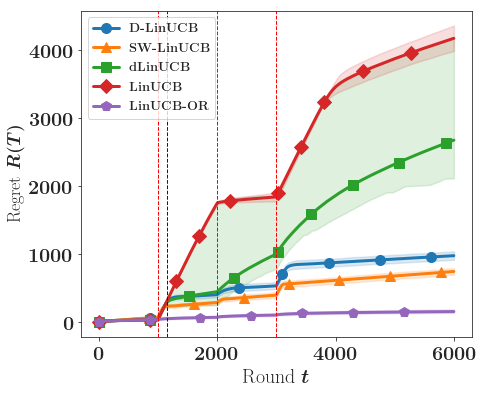

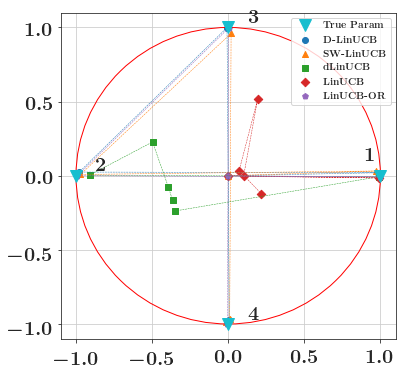

In [10]:
# Plot average on 100 independent experiments
print(timedic_100) # Computation time for the different policies
plot_regret(data_100, t_saved, filename = None, log=False, qtl=True, loc=2, font=13, bp = bp, bp_2 = {1157:''})
scatter_abrupt(theta_hat_100, None, theta, bp, loc=0, font=10, circle=True)

In [38]:
# For simplifying the plot and removing unwanted policies
theta_hat_100_partial = {}
theta_hat_100_partial['D-LinUCB'] = theta_hat_100['D-LinUCB']
theta_hat_100_partial['SW-LinUCB'] = theta_hat_100['SW-LinUCB']
theta_hat_100_partial['dLinUCB'] = theta_hat_100['dLinUCB']
theta_hat_100_partial['LinUCB'] = theta_hat_100['LinUCB']

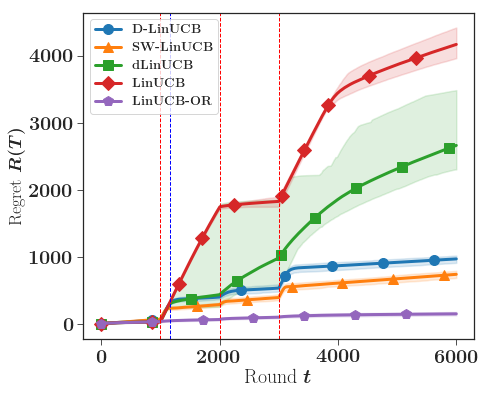

In [43]:
plot_regret(data_100, t_saved, filename = None, log=False, qtl=True, loc=2, font=13, bp = bp, bp_2 = {1157:''})

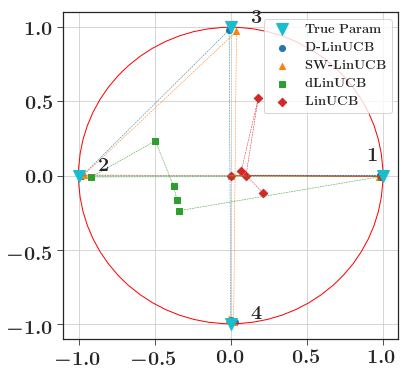

In [46]:
# when removing the LinUCB-OR policy
scatter_abrupt(theta_hat_100_partial, None, theta, bp, loc=0, font=13, circle=True)

# Parallelized experiments

In [12]:
n_process = 11

file = 'abrupt_par_exp_final'
policies = [DLinUCB(d, delta, alpha, lambda_, s, gamma, '', sm = False, sigma_noise = sigma_noise, verbose=verbose),
            SWLinUCB(d, delta, alpha, lambda_, s, tau, '', sm=False, sigma_noise=sigma_noise, verbose=verbose),
            DynamicLinUCB(d, delta, alpha, lambda_, s, tau=200, name='', filename = file,
                          sm=True, sigma_noise = sigma_noise, delta_2=0.01, tilde_delta=0.002, verbose=False, 
                          omniscient=False),
            PolicyLinUCB(d, delta, alpha, lambda_, s, '', sm = True, sigma_noise = sigma_noise, verbose=verbose),
            PolicyLinUCB(d, delta, alpha, lambda_, s, '-OR', sm = True, sigma_noise = sigma_noise, verbose=verbose,
                        omniscient = True)
           ]

n_expe = 100
data_par = data_from_experiment(n_expe,'par')

Creation of a new model at time:1104
Creation of a new model at time:1152
Creation of a new model at time:1125
Creation of a new model at time:1191
Creation of a new model at time:1136
Creation of a new model at time:1095
Creation of a new model at time:1123
Creation of a new model at time:1091
Creation of a new model at time:1122
Creation of a new model at time:1136
Creation of a new model at time:1150
Creation of a new model at time:1179
Creation of a new model at time:1064
Creation of a new model at time:1135
Creation of a new model at time:1179
Creation of a new model at time:1114
Creation of a new model at time:1167
Creation of a new model at time:1174
Creation of a new model at time:1094
Creation of a new model at time:1139
Creation of a new model at time:1185
Creation of a new model at time:1198
Creation of a new model at time:3205
Creation of a new model at time:1145
Creation of a new model at time:1105
Creation of a new model at time:1090
Creation of a new model at time:1139
C

In [14]:
with open("detection_out/" + file, 'r') as f:
    detect = list(map(lambda x:x.strip(),f.readlines()))

detect = [int(el) for el in detect]
list_1 = [el for el in detect if el < 2000]
list_2 = [el for el in detect if el < 3000 and el >= 2000]
list_3 = [el for el in detect if  el >= 3000]

# Number of detections
print(len(list_1))
print(len(list_2))
print(len(list_3))


95
0
6


In [19]:
print('Percentage of detection first breakpoint:', len(list_1)/n_expe*100)
print('Percentage of detection second breakpoint:',len(list_2)/n_expe*100)
print('Percentage of detection third breakpoint:',len(list_3)/n_expe*100)

Percentage of detection first breakpoint: 95.0
Percentage of detection second breakpoint: 0.0
Percentage of detection third breakpoint: 6.0


In [21]:
print(np.mean(list_1)) # Average detection step of the first breakpoint
print(np.mean(list_3)) # Average detection step of the third breakpoint

1150.93684211
3207.5
